**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

| NOMBRE | MATRÍCULA  |
|--------|------------|
| Carlos Avila Arguello | A01796133 |
| Carlos Pano Hernández | A01066264 |
| Hiram Garcia Austria | A00378771 |
| Javier Emmanuel García Escobedo | A01411206|

In [232]:
# from google.colab import drive
# drive.mount('/content/drive')

In [233]:
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia de Datos/Semana 8"
# os.chdir(DIR)

In [272]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para preprocesamiento e ing de características
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Librerías para la canalización
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

# Librerías para la regresión
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [235]:
insurance_df = pd.read_csv('data/insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [236]:
# Variables numéricas
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [237]:
# Variables categóricas
insurance_df.describe(include="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [238]:
# Crear listas con las columnas categóricas y numéricas, respectivamente
num_cols = insurance_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = insurance_df.select_dtypes(exclude=np.number).columns.tolist()

In [239]:
# Recuento de cada categoría única en las variables categóricas
for column in cat_cols:
    print(column)
    print(insurance_df[column].value_counts())
    print('-' * 50)

sex
sex
male      676
female    662
Name: count, dtype: int64
--------------------------------------------------
smoker
smoker
no     1064
yes     274
Name: count, dtype: int64
--------------------------------------------------
region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
--------------------------------------------------


1b) Búsqueda de valores faltantes.

In [240]:
insurance_df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

No hay valores faltantes en este conjunto de datos.

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

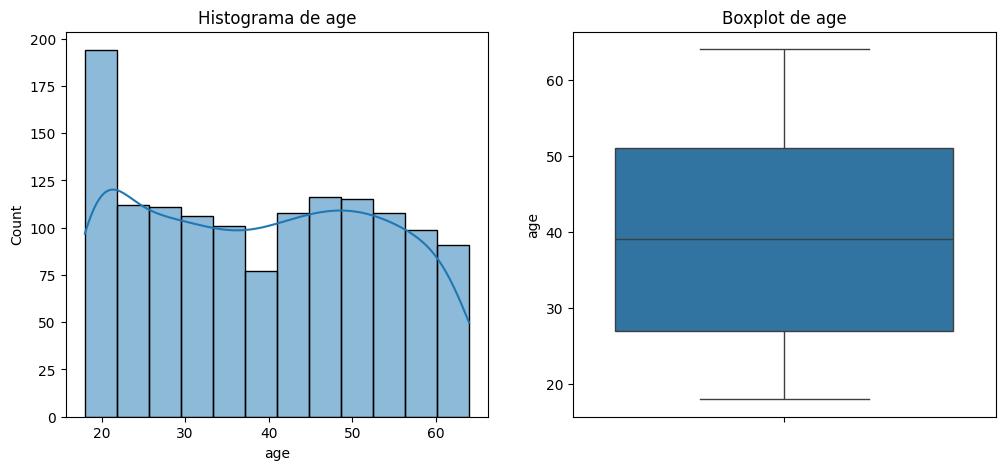

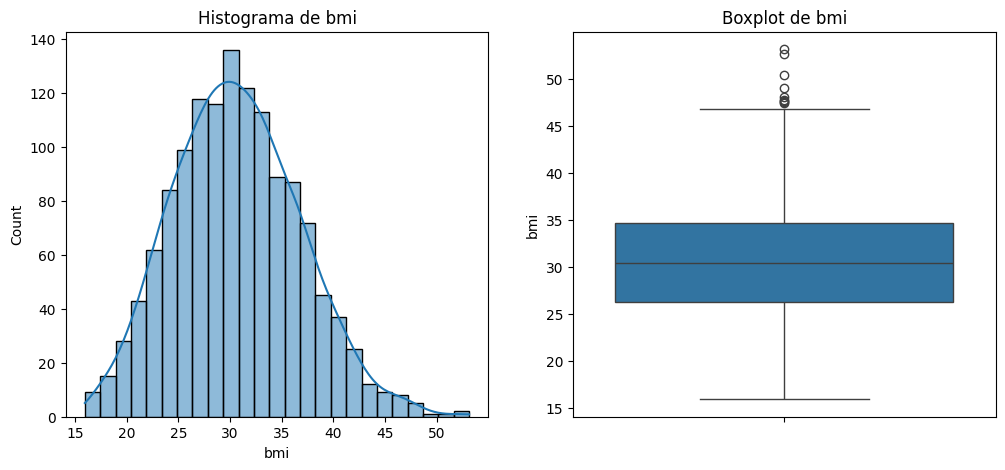

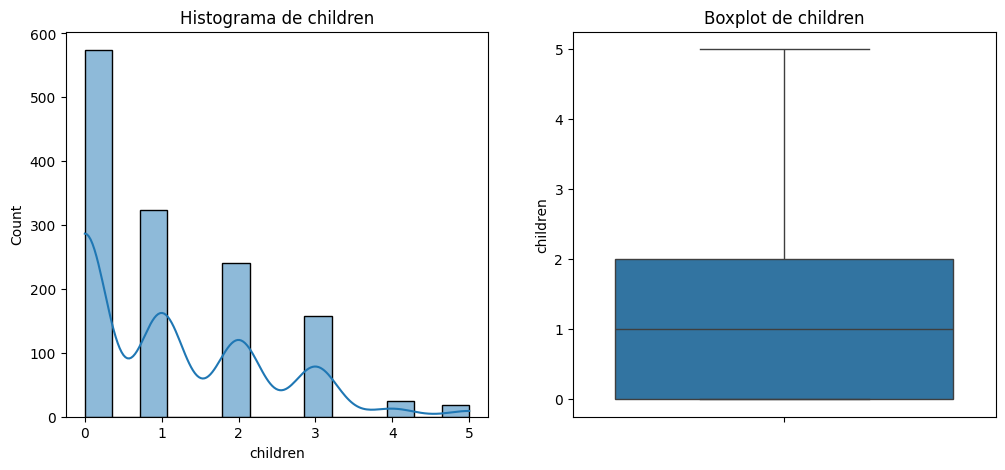

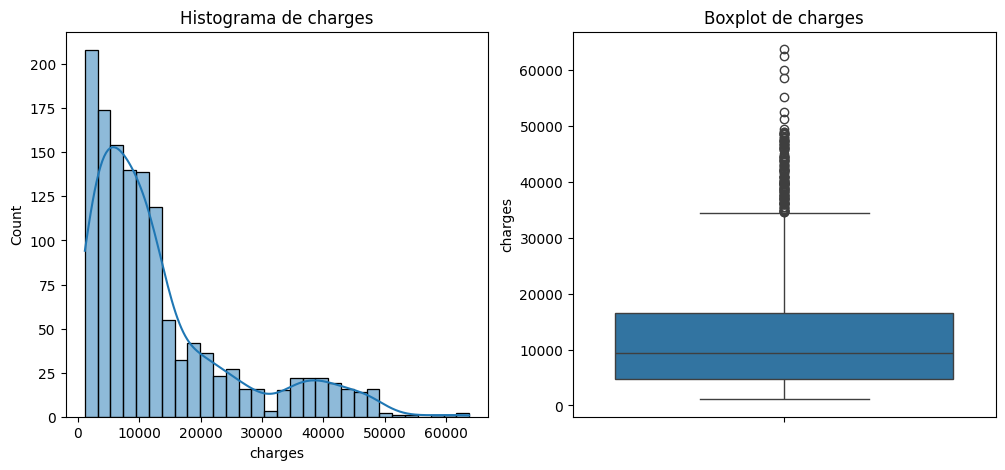

In [241]:
# Variables numéricas

for var in num_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(insurance_df[var], kde=True)
    plt.title(f'Histograma de {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=insurance_df[var])
    plt.title(f'Boxplot de {var}')

    plt.show()

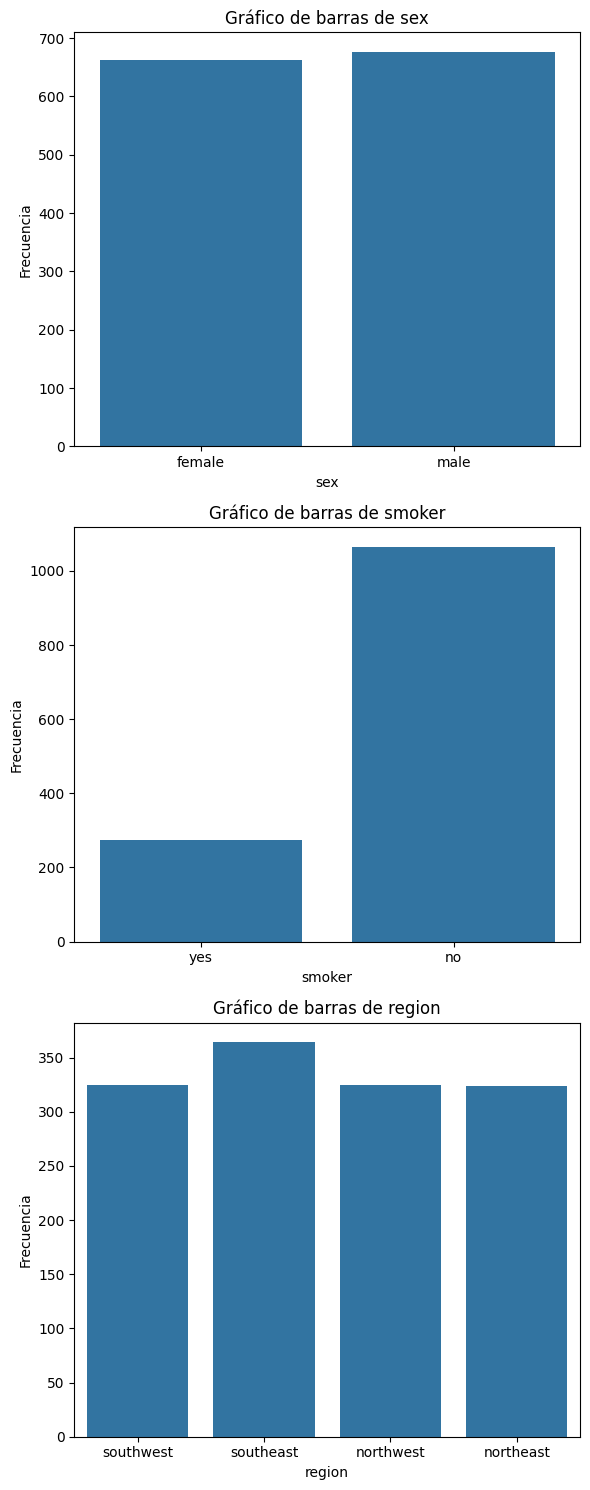

In [242]:
#Variables categóricas
num_plots = len(cat_cols)
cols_per_row = 1  # 1 columna por fila
num_rows = num_plots  # Un gráfico por fila

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(6, 5 * num_plots))

for i, var in enumerate(cat_cols):
    sns.countplot(x=var, data=insurance_df, ax=axes[i])
    axes[i].set_title(f'Gráfico de barras de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

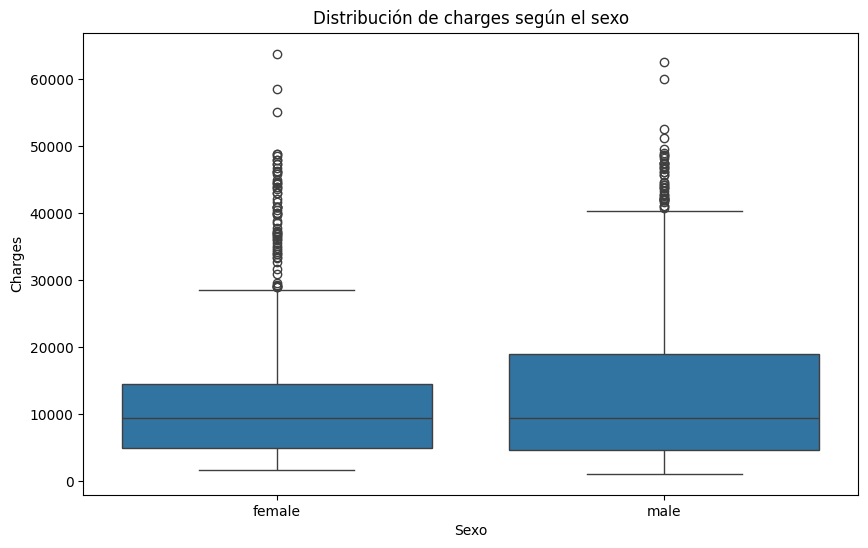

In [243]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=insurance_df)
plt.title('Distribución de charges según el sexo')
plt.xlabel('Sexo')
plt.ylabel('Charges')
plt.show()

Solo considerando el gráfico, no parece que exista diferencias significativas en las distribuciones de "charges" según el sexo. Sin embargo hay diferencias notorias como el rango aumentado para "male". El "charge" *mínimo* parece ser prácticamente el mismo así como el promedio. Es notorio que existen mayor cantidad de outliers para la distribución de charges para la etiqueta female.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

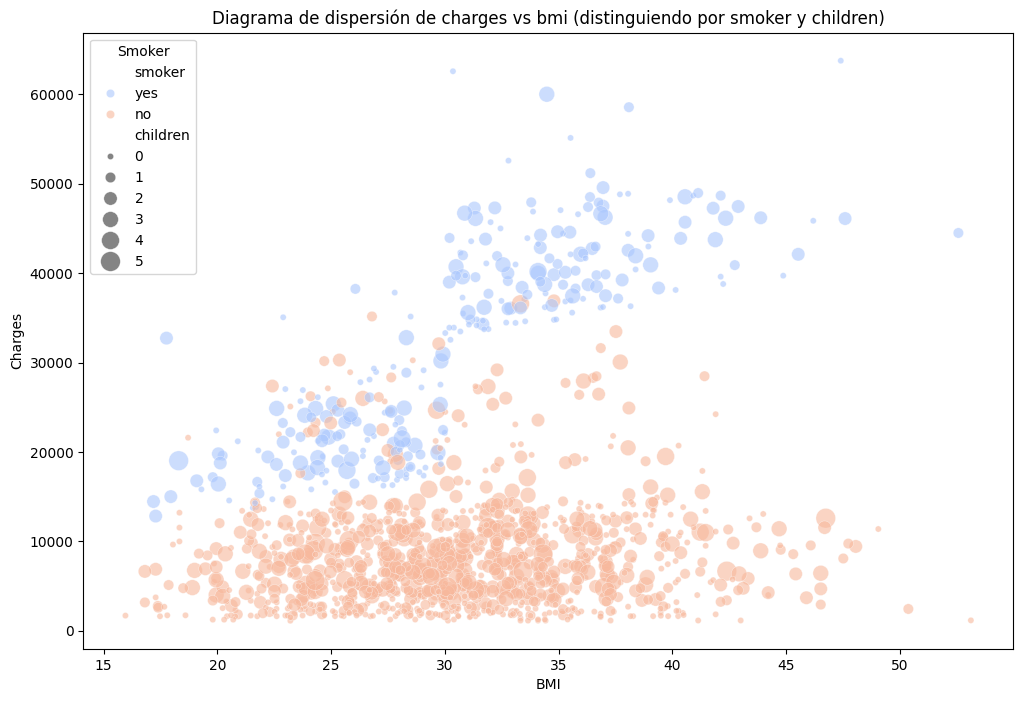

In [244]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', palette='coolwarm', sizes=(20, 200), alpha=0.6)

plt.title('Diagrama de dispersión de charges vs bmi (distinguiendo por smoker y children)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

Lo que se puede observar, es que las personas fumadoras son más propensas a
tener que recurrir a gastos médicos que las no fumadras, además que, en
algunos casos, mientras mayor cantidad de hijos tienen, también más recurren a gastos médicos.

Dado que se pueden notar puntos de diversos tamaños en cada parte del gráfico, podríamos hacer la hipótesis de que no existe una relación clara entre el número de hijos con respecto a los `charges` pero sí es claro que las personas que sí fuman, tienen mayor `charges` que las que no.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

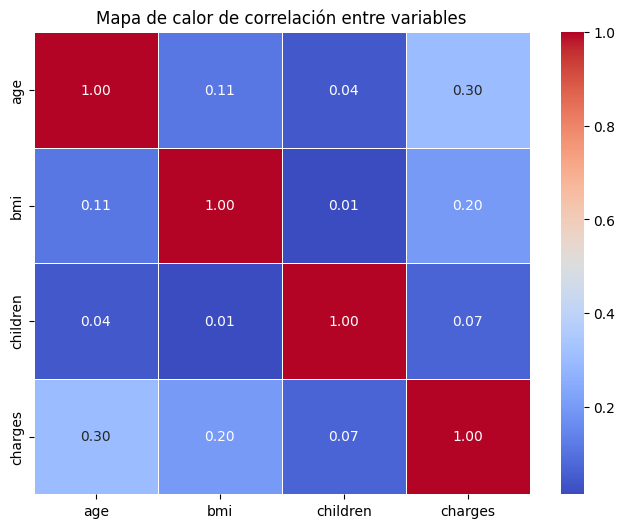

In [245]:
corr_matrix = insurance_df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [246]:
# Obtener DF con las observaciones que tengan datos atípicos (outliers) para la variable "charges"
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = insurance_df[(insurance_df['charges'] < lower_bound) | (insurance_df['charges'] > upper_bound)]
outliers_df

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [247]:
# Calcular el promedio de 'age' y 'bmi' en el DataFrame de valores atípicos
average_age = outliers_df['age'].mean()
average_bmi = outliers_df['bmi'].mean()

print("El promedio de edad para el conjunto de outliers en charges, es:", round(average_age,ndigits=2))

El promedio de edad para el conjunto de outliers en charges, es: 41.08


In [248]:
print("El promedio de BMI para el conjunto de outliers en charges, es:", round(average_bmi,ndigits=2))

El promedio de BMI para el conjunto de outliers en charges, es: 35.56


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [249]:
# Calcular el número total de observaciones
total_observations = len(outliers_df)

# Calcular el número de observaciones por 'sex'
sex_counts = outliers_df['sex'].value_counts()
percentage_female = (sex_counts.get('female', 0) / total_observations) * 100
percentage_male = (sex_counts.get('male', 0) / total_observations) * 100

# Calcular el número de observaciones por 'smoker'
smoker_counts = outliers_df['smoker'].value_counts()
percentage_smoker = (smoker_counts.get('yes', 0) / total_observations) * 100
percentage_non_smoker = (smoker_counts.get('no', 0) / total_observations) * 100

# Crear las tablas
sex_table = pd.DataFrame({
    'Sexo': ['Mujer', 'Hombre'],
    'Porcentaje de Outliers': [percentage_female, percentage_male]
})

smoker_table = pd.DataFrame({
    'Fumador': ['Sí', 'No'],
    'Porcentaje de Outliers': [percentage_smoker, percentage_non_smoker]
})

sex_table

,Sexo,Porcentaje de Outliers
0,Mujer,35.971223
1,Hombre,64.028777


In [250]:
smoker_table

,Fumador,Porcentaje de Outliers
0,Sí,97.841727
1,No,2.158273


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [251]:
X = insurance_df.drop('charges', axis = 1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [252]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [253]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))])

In [254]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x136d2a110>),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x136d2bc90>)])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [275]:
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)
predictions = lr_model.predict(Xtest)

print('The Root Mean Square Error (RMSE) is:', mean_squared_error(ytest, predictions))
print('The R square (R2) is:', r2_score(ytest, predictions))

The Root Mean Square Error (RMSE) is: 35479352.80730363
The R square (R2) is: 0.7623311844057112


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [256]:
print("upper_bound: ", upper_bound) # Valor de la pregunta 3a
ytrain[ytrain >= upper_bound].head(3) # Confirmando valores de charges arriba del límite superior

upper_bound:  34489.350562499996


288     47896.79135
1090    41676.08110
697     40273.64550
Name: charges, dtype: float64

In [274]:
ytrain_upper_bound = np.where(ytrain > upper_bound, upper_bound, ytrain)
ytest_upper_bound = np.where(ytest > upper_bound, upper_bound, ytest)

lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(Xtrain, ytrain_upper_bound)

predictions2 = lr_model2.predict(Xtest)

print('The Root Mean Square Error (RMSE) is:', mean_squared_error(ytest_upper_bound, predictions2))
print('The R square (R2) is:', r2_score(ytest_replaced, predictions2))

The Root Mean Square Error (RMSE) is: 24145522.656857755
The R square (R2) is: 0.7611898810108253


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [273]:
num_pipeline2 = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_pipeline2 = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder())

preprocessing2 = ColumnTransformer([
    ('num', num_pipeline2, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline2, make_column_selector(dtype_include=object))
])

lr_model3 = make_pipeline(preprocessing2, LinearRegression())

lr_model3.fit(Xtrain, ytrain_upper_bound)
predictions3 = lr_model3.predict(Xtest)

print('The Root Mean Square Error (RMSE) is:', mean_squared_error(ytest_upper_bound, predictions3))
print('The R square (R2) is:', r2_score(ytest_upper_bound, predictions3))

The Root Mean Square Error (RMSE) is: 24101242.412301157
The R square (R2) is: 0.7616278326187367


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [286]:


best_degree = None
best_rmse = float('inf')  # Inicializa con un valor alto para encontrar un mejor rendimiento
for degree in range(1, 11):  # Probar Grados del 1 al 10
    print('Degree: ', degree)
    poly_features = PolynomialFeatures(degree=degree)
    num_pipeline_poly = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), poly_features)
    
    preprocessing_poly = ColumnTransformer([
        ('num', num_pipeline_poly, make_column_selector(dtype_include=np.number)),
        ('cat', cat_pipeline2, make_column_selector(dtype_include=object))
    ])
    
    lr_model_poly = make_pipeline(preprocessing_poly, LinearRegression())
    lr_model_poly.fit(Xtrain, ytrain_upper_bound)
    predictions_poly = lr_model_poly.predict(Xtest)
    
    rmse_poly = root_mean_squared_error(ytest_upper_bound, predictions_poly)
    print('The Root Mean Square Error (RMSE) is:', rmse_poly)
    print('The R square (R2) is:', r2_score(ytest_upper_bound, predictions_poly))
    print('---------')
    
    if rmse_poly < best_rmse:
        best_rmse = rmse_poly
        best_degree = degree

print("Best degree:", best_degree)
print("Best RMSE:", best_rmse)


Degree:  1
The Root Mean Square Error (RMSE) is: 4909.30162164652
The R square (R2) is: 0.7616278326187367
---------
Degree:  2
The Root Mean Square Error (RMSE) is: 4874.52033728167
The R square (R2) is: 0.7649934928451688
---------
Degree:  3
The Root Mean Square Error (RMSE) is: 4910.380016869769
The R square (R2) is: 0.7615230977053907
---------
Degree:  4
The Root Mean Square Error (RMSE) is: 4966.893996673461
The R square (R2) is: 0.7560022075235359
---------
Degree:  5
The Root Mean Square Error (RMSE) is: 4969.830707210872
The R square (R2) is: 0.7557135914501536
---------
Degree:  6
The Root Mean Square Error (RMSE) is: 5063.5645486953
The R square (R2) is: 0.7464119316484636
---------
Degree:  7
The Root Mean Square Error (RMSE) is: 9358.983186343628
The R square (R2) is: 0.13368975882344725
---------
Degree:  8
The Root Mean Square Error (RMSE) is: 60363.235257410335
The R square (R2) is: -35.0380373580725
---------
Degree:  9
The Root Mean Square Error (RMSE) is: 267379.386

In [288]:
# Usando el grado 2
poly_features_best = PolynomialFeatures(degree=best_degree)
num_pipeline_poly_best = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), poly_features_best)

preprocessing_poly_best = ColumnTransformer([
    ('num', num_pipeline_poly_best, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline2, make_column_selector(dtype_include=object))
])

lr_model4 = make_pipeline(preprocessing_poly_best, LinearRegression())
lr_model4.fit(Xtrain, ytrain_upper_bound)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x136ccf850>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x136d6d3d0>)])),
                ('linearregression', LinearRegression())])

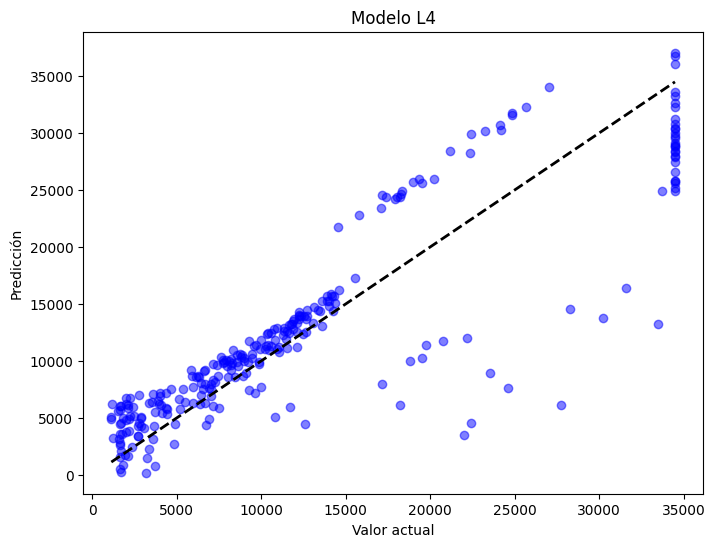

In [290]:
predictions_lr_model4 = lr_model4.predict(Xtest)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(ytest_upper_bound, predictions_lr_model4, color='blue', alpha=0.5)
plt.plot([ytest_upper_bound.min(), ytest_upper_bound.max()], [ytest_upper_bound.min(), ytest_upper_bound.max()], 'k--', lw=2)
plt.xlabel('Valor actual')
plt.ylabel('Predicción')
plt.title('Modelo L4')
plt.show()